In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [13]:
stats_sh_sc_ma = pd.read_csv('shenzhen_santacasa_manaus.csv')
stats_sh_sc_ma.head()

,Unnamed: 0,train_tag,op_name,test,sort,file_name,max_sp,auc,sens,spec,...,threshold_at_val,sp_index_test,sens_at_test,spec_at_test,threshold_at_test,sp_index_op,sens_at_op,spec_at_op,threshold_at_op,inference
0,0,base.sh-sc-ma.e,loose,3,0,/mnt/brics_data/models/v0/user.philipp.gaspar....,0.887787,0.949577,0.860000,0.916016,...,0.251501,0.805396,0.810811,0.800000,0.251501,0.872970,0.893491,0.852686,0.251501,"OrderedDict([('russia', OrderedDict([('sp_inde..."
1,1,base.sh-sc-ma.e,loose,5,2,/mnt/brics_data/models/v0/user.philipp.gaspar....,0.903571,0.963702,0.897010,0.910156,...,0.488624,0.786864,0.729730,0.846154,0.488624,0.886080,0.872781,0.899480,0.488624,"OrderedDict([('russia', OrderedDict([('sp_inde..."
2,2,base.sh-sc-ma.e,loose,4,0,/mnt/brics_data/models/v0/user.philipp.gaspar....,0.909840,0.974531,0.943333,0.876953,...,0.542073,0.797659,0.810811,0.784615,0.542073,0.901666,0.893491,0.909879,0.542073,"OrderedDict([('russia', OrderedDict([('sp_inde..."
3,3,base.sh-sc-ma.e,loose,2,0,/mnt/brics_data/models/v0/user.philipp.gaspar....,0.892813,0.965534,0.883333,0.902344,...,0.466264,0.807106,0.783784,0.830769,0.466264,0.882858,0.890533,0.875217,0.466264,"OrderedDict([('russia', OrderedDict([('sp_inde..."
4,4,base.sh-sc-ma.e,loose,3,8,/mnt/brics_data/models/v0/user.philipp.gaspar....,0.886890,0.953133,0.910000,0.864078,...,0.378321,0.794266,0.729730,0.861538,0.378321,0.881740,0.902367,0.861352,0.378321,"OrderedDict([('russia', OrderedDict([('sp_inde..."


In [14]:
stats_sh_sc_ma['train_tag'].unique()

array(['base.sh-sc-ma.e', 'alto.sh-sc-ma.ewp', 'inte.sh-sc-ma.ewp',
       'alto.sh-sc-ma.ewpc', 'inte.sh-sc-ma.ewpc'], dtype=object)

In [48]:
stats_sh_sc_ma.loc[stats_sh_sc_ma['train_tag'] == 'alto.sh-sc-ma.ewpc']['op_name'].unique()

array(['loose'], dtype=object)

In [ ]:
#Checking the normality of the 

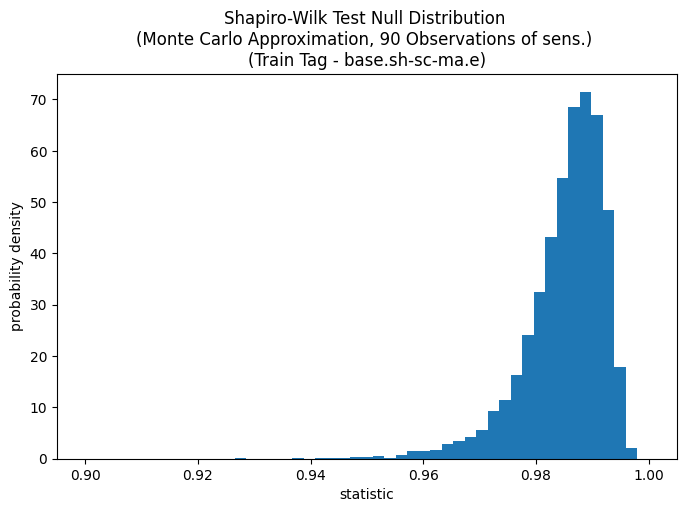

In [49]:
train_tag = 'base.sh-sc-ma.e'
stat2look = 'sens'
serie_size = len(stats_sh_sc_ma.loc[stats_sh_sc_ma['train_tag'] == train_tag][stat2look])
def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic
ref = stats.monte_carlo_test(stats_sh_sc_ma.loc[stats_sh_sc_ma['train_tag'] == train_tag][stat2look], stats.norm.rvs, statistic, alternative='less')

fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.9, 1, 50)
def plot(ax):  # we'll reuse this
    ax.hist(ref.null_distribution, density=True, bins=bins)
    ax.set_title(f"Shapiro-Wilk Test Null Distribution \n"
                 f"(Monte Carlo Approximation, {serie_size} Observations of {stat2look}.) \n"
                 f"(Train Tag - {train_tag})")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

The p-value is 0.0375. Therefore the distribution is not a Gaussian with 95% level of confidence


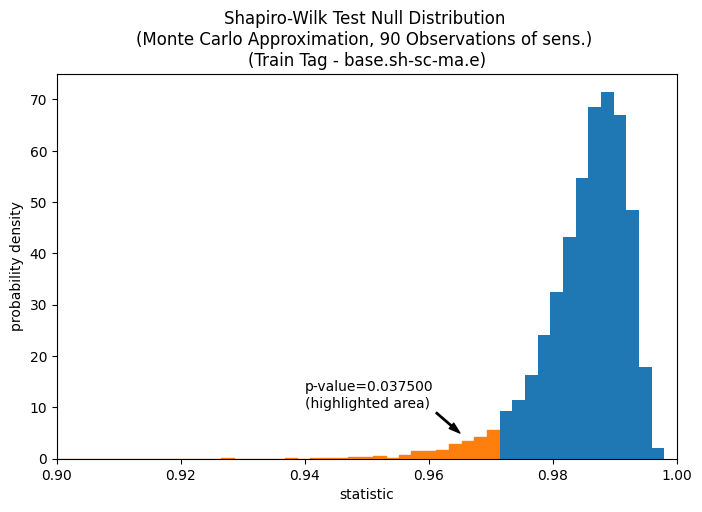

In [50]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
annotation = (f'p-value={ref.pvalue:.6f}\n(highlighted area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (0.965, 5), (0.94, 10), arrowprops=props)
i_extreme = np.where(bins <= ref.statistic)[0]
for i in i_extreme:
    ax.patches[i].set_color('C1')
plt.xlim(0.9, 1)
#plt.ylim(0, 4)
plt.show
if ref.pvalue < 0.01:
    print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 99% level of confidence")
else:
    if ref.pvalue < 0.05:
        print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 95% level of confidence")
    else:
        if ref.pvalue < 0.1:
            print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 90% level of confidence")
        else:
            print(f"The p-value is {ref.pvalue}. Therefore there is no evidence that the distribution is different from a Gaussian.")


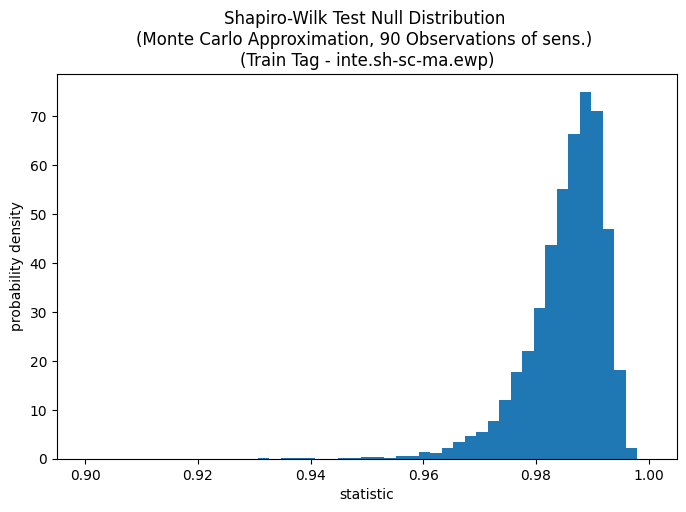

In [51]:
train_tag = 'inte.sh-sc-ma.ewp'
stat2look = 'sens'
serie_size = len(stats_sh_sc_ma.loc[stats_sh_sc_ma['train_tag'] == train_tag][stat2look])
def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic
ref = stats.monte_carlo_test(stats_sh_sc_ma.loc[stats_sh_sc_ma['train_tag'] == train_tag][stat2look], stats.norm.rvs, statistic, alternative='less')

fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.9, 1, 50)
def plot(ax):  # we'll reuse this
    ax.hist(ref.null_distribution, density=True, bins=bins)
    ax.set_title(f"Shapiro-Wilk Test Null Distribution \n"
                 f"(Monte Carlo Approximation, {serie_size} Observations of {stat2look}.) \n"
                 f"(Train Tag - {train_tag})")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

The p-value is 0.0046. Therefore the distribution is not a Gaussian with 99% level of confidence


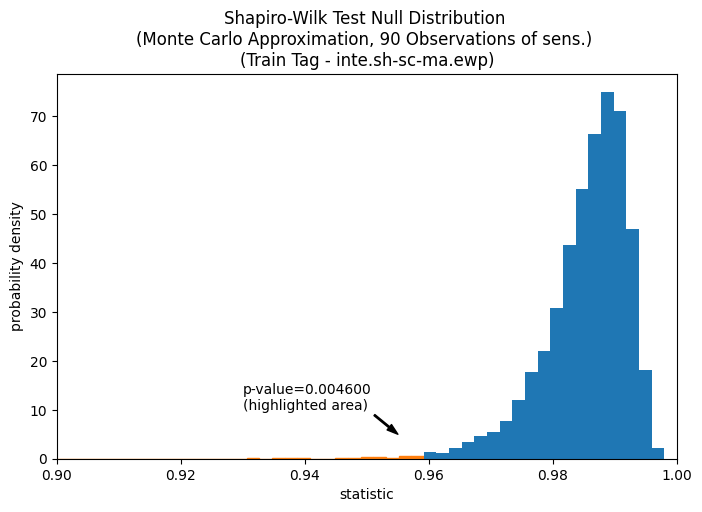

In [56]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
annotation = (f'p-value={ref.pvalue:.6f}\n(highlighted area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (0.955, 5), (0.93, 10), arrowprops=props)
i_extreme = np.where(bins <= ref.statistic)[0]
for i in i_extreme:
    ax.patches[i].set_color('C1')
plt.xlim(0.9, 1)
#plt.ylim(0, 4)
plt.show
if ref.pvalue < 0.01:
    print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 99% level of confidence")
else:
    if ref.pvalue < 0.05:
        print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 95% level of confidence")
    else:
        if ref.pvalue < 0.1:
            print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 90% level of confidence")
        else:
            print(f"The p-value is {ref.pvalue}. Therefore there is no evidence that the distribution is different from a Gaussian.")


In [ ]:
#The two distributions are not gaussian. 
#Therefore, we should use the Wilcoxon Test for doing inference for comparing the two distribuitions